In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
print("✅ Dataset loaded successfully.")
print("Shape of dataset:", data.shape)
print("\nFirst 5 rows:")
print(data.head())


✅ Dataset loaded successfully.
Shape of dataset: (582, 11)

First 5 rows:
   65 Female   0.7  0.1  187  16   18  6.8  3.3   0.9  1
0  62   Male  10.9  5.5  699  64  100  7.5  3.2  0.74  1
1  62   Male   7.3  4.1  490  60   68  7.0  3.3  0.89  1
2  58   Male   1.0  0.4  182  14   20  6.8  3.4  1.00  1
3  72   Male   3.9  2.0  195  27   59  7.3  2.4  0.40  1
4  46   Male   1.8  0.7  208  19   14  7.6  4.4  1.30  1


In [6]:
data.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
                'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
                'Albumin_and_Globulin_Ratio', 'Target']

print("\n🧹 Checking missing values:")
print(data.isnull().sum())

data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Target'] = data['Target'].apply(lambda x: 1 if x == 1 else 0)

print("\n✅ Missing values handled and categorical data encoded.")


🧹 Checking missing values:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64

✅ Missing values handled and categorical data encoded.


In [5]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)



In [7]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

data['Target'] = data['Target'].apply(lambda x: 1 if x == 1 else 0)

print("\n✅ Missing values handled and categorical data encoded.")



✅ Missing values handled and categorical data encoded.



🎯 Target variable value counts:
Target
1    415
0    167
Name: count, dtype: int64


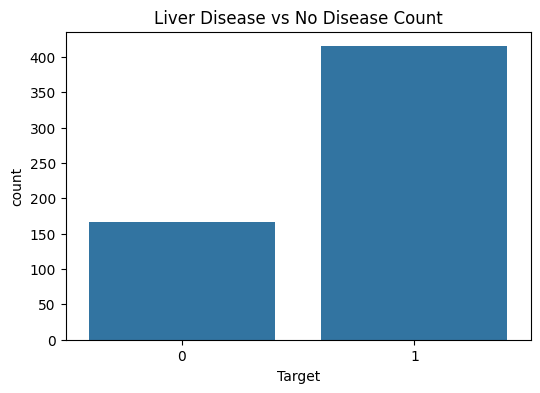

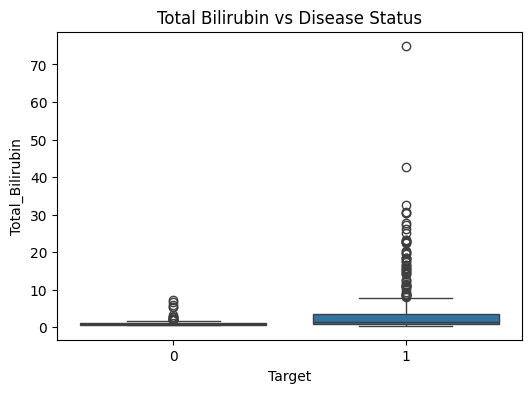

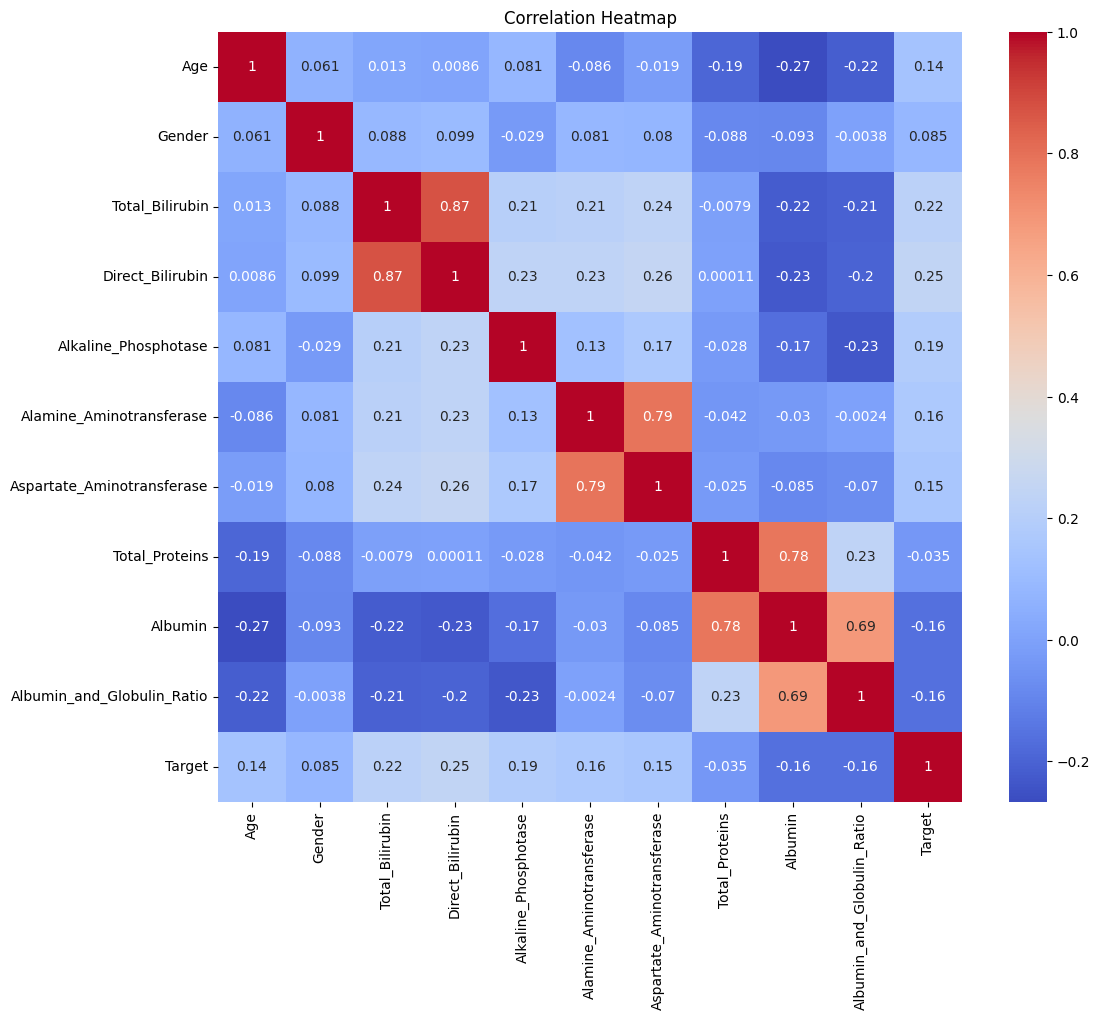

In [8]:
print("\n🎯 Target variable value counts:")
print(data['Target'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=data)
plt.title("Liver Disease vs No Disease Count")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Target', y='Total_Bilirubin', data=data)
plt.title("Total Bilirubin vs Disease Status")
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X = data.drop('Target', axis=1)
y = data['Target']

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

print("✅ Data split into training and testing sets.")

✅ Data split into training and testing sets.


In [10]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Training and evaluating: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


🔍 Training and evaluating: Logistic Regression
✅ Accuracy: 0.73
Confusion Matrix:
[[ 9 29]
 [11 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.24      0.31        38
           1       0.77      0.90      0.83       108

    accuracy                           0.73       146
   macro avg       0.61      0.57      0.57       146
weighted avg       0.69      0.73      0.69       146


🔍 Training and evaluating: Decision Tree
✅ Accuracy: 0.71
Confusion Matrix:
[[15 23]
 [20 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        38
           1       0.79      0.81      0.80       108

    accuracy                           0.71       146
   macro avg       0.61      0.60      0.61       146
weighted avg       0.70      0.71      0.70       146


🔍 Training and evaluating: Random Forest
✅ Accuracy: 0.73
Confusion Matrix:
[[16 22]
 [18 90]]
Classi

In [11]:
print("\n📊 Model Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

best_model = max(results, key=results.get)
print(f"\n🏆 Best Performing Model: {best_model}")



📊 Model Accuracy Comparison:
Logistic Regression: 0.73
Decision Tree: 0.71
Random Forest: 0.73
K-Nearest Neighbors: 0.68
Support Vector Machine: 0.74

🏆 Best Performing Model: Support Vector Machine


In [12]:
print("""
🧠 Model Design Explanation:

1. We preprocessed data by handling missing values and encoding categorical variables.
2. Used StandardScaler for normalization to aid models like KNN and SVM.
3. Tried 5 different classifiers:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - K-Nearest Neighbors
   - Support Vector Machine
4. Evaluated models using Accuracy, Confusion Matrix, and Classification Report.
5. Selected the best model based on highest accuracy score.

Random Forest typically works well with imbalanced and non-linear data.
""")


🧠 Model Design Explanation:

1. We preprocessed data by handling missing values and encoding categorical variables.
2. Used StandardScaler for normalization to aid models like KNN and SVM.
3. Tried 5 different classifiers:
   - Logistic Regression
   - Decision Tree
   - Random Forest
   - K-Nearest Neighbors
   - Support Vector Machine
4. Evaluated models using Accuracy, Confusion Matrix, and Classification Report.
5. Selected the best model based on highest accuracy score.

Random Forest typically works well with imbalanced and non-linear data.



In [13]:
print("""
🧩 Challenges Faced & Solutions:

1. Missing Values:
   - 'Albumin_and_Globulin_Ratio' had missing entries.
   - Used median imputation to handle them.

2. Categorical Data:
   - 'Gender' was a categorical variable.
   - Applied Label Encoding (Male = 1, Female = 0).

3. Imbalanced Data:
   - More liver disease cases than non-disease.
   - Used Random Forest to handle class imbalance well.

4. Feature Scaling:
   - Models like KNN and SVM are sensitive to scale.
   - Applied StandardScaler for better performance.

5. Model Selection:
   - Tried multiple models and compared metrics.
   - Selected best based on performance and stability.
""")


🧩 Challenges Faced & Solutions:

1. Missing Values:
   - 'Albumin_and_Globulin_Ratio' had missing entries.
   - Used median imputation to handle them.

2. Categorical Data:
   - 'Gender' was a categorical variable.
   - Applied Label Encoding (Male = 1, Female = 0).

3. Imbalanced Data:
   - More liver disease cases than non-disease.
   - Used Random Forest to handle class imbalance well.

4. Feature Scaling:
   - Models like KNN and SVM are sensitive to scale.
   - Applied StandardScaler for better performance.

5. Model Selection:
   - Tried multiple models and compared metrics.
   - Selected best based on performance and stability.

